In [ ]:
# Import Libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE , RandomOverSampler
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/nearest-earth-objects(1910-2024).csv")
df.head()

neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         False  
3         False  
4         False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [ ]:
df.describe().T

count          mean           std           min  \
neo_id                  338199.0  1.759939e+07  2.287225e+07  2.000433e+06   
absolute_magnitude      338171.0  2.293252e+01  2.911216e+00  9.250000e+00   
estimated_diameter_min  338171.0  1.578120e-01  3.138851e-01  5.111578e-04   
estimated_diameter_max  338171.0  3.528785e-01  7.018685e-01  1.142983e-03   
relative_velocity       338199.0  5.106066e+04  2.639924e+04  2.033464e+02   
miss_distance           338199.0  4.153535e+07  2.077399e+07  6.745533e+03   

                                 25%           50%           75%           max  
neo_id                  3.373980e+06  3.742127e+06  5.405374e+07  5.446281e+07  
absolute_magnitude      2.074000e+01  2.280000e+01  2.510000e+01  3.358000e+01  
estimated_diameter_min  2.538370e-02  7.320740e-02  1.890406e-01  3.754525e+01  
estimated_diameter_max  5.675969e-02  1.636967e-01  4.227075e-01  8.395373e+01  
relative_velocity       3.071203e+04  4.756047e+04  6.667382e+04  2.917811e+05  
miss_distance           2.494540e+07  4.332674e+07  5.933961e+07  7.479865e+07

In [ ]:
# Drop Unecessary Variables
df = df.drop("neo_id", axis=1)
df = df.drop("name", axis=1)
df = df.drop("orbiting_body", axis=1)


In [ ]:
# Categorical and Continuous Features

categorical_features = ['']
continuous_features = ['absolute_magnitude','estimated_diameter_min','estimated_diameter_max','relative_velocity','miss_distance']


In [ ]:
# Handling Duplicated Values
print("the sum of duplications ")

print(df.duplicated().sum())

the sum of duplications 
5


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
# The data after delete the duplications
print("the sum of duplications ")

print(df.duplicated().sum())

the sum of duplications 
0


In [ ]:
# Handling Missing Values
Miss_df = df.isna().sum()
output_ms = pd.DataFrame(Miss_df, columns=['Missing Values in DATA'])
output_ms


Missing Values in DATA
absolute_magnitude                          28
estimated_diameter_min                      28
estimated_diameter_max                      28
relative_velocity                            0
miss_distance                                0
is_hazardous                                 0

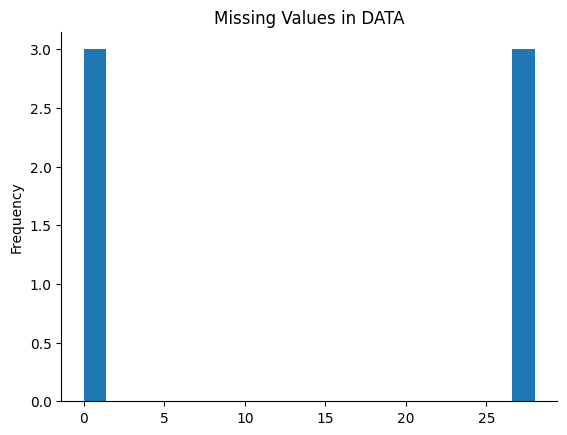

In [ ]:
#Missing Values in DATA

from matplotlib import pyplot as plt
output_ms['Missing Values in DATA'].plot(kind='hist', bins=20, title='Missing Values in DATA')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# for Continuous features
def fill_missing_values_by_mean(df, cols):
    for col in cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df
cols = continuous_features
df = fill_missing_values_by_mean(df, cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338194 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338194 non-null  float64
 1   estimated_diameter_min  338194 non-null  float64
 2   estimated_diameter_max  338194 non-null  float64
 3   relative_velocity       338194 non-null  float64
 4   miss_distance           338194 non-null  float64
 5   is_hazardous            338194 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 15.8 MB


<Axes: >

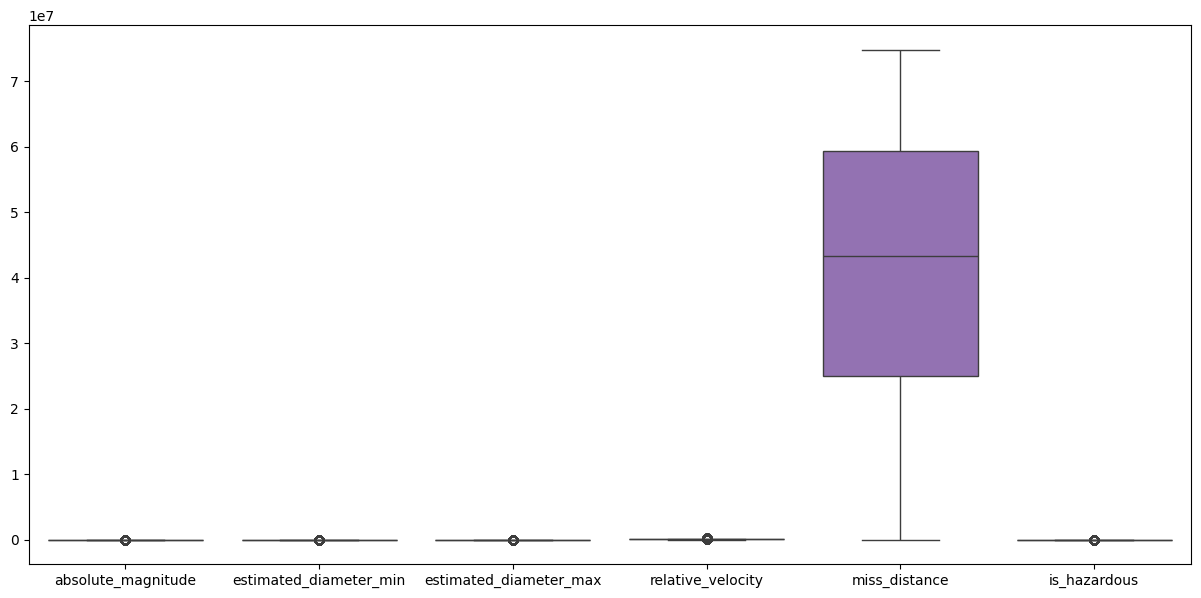

In [ ]:
# Handling Outlier Values
f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(df)

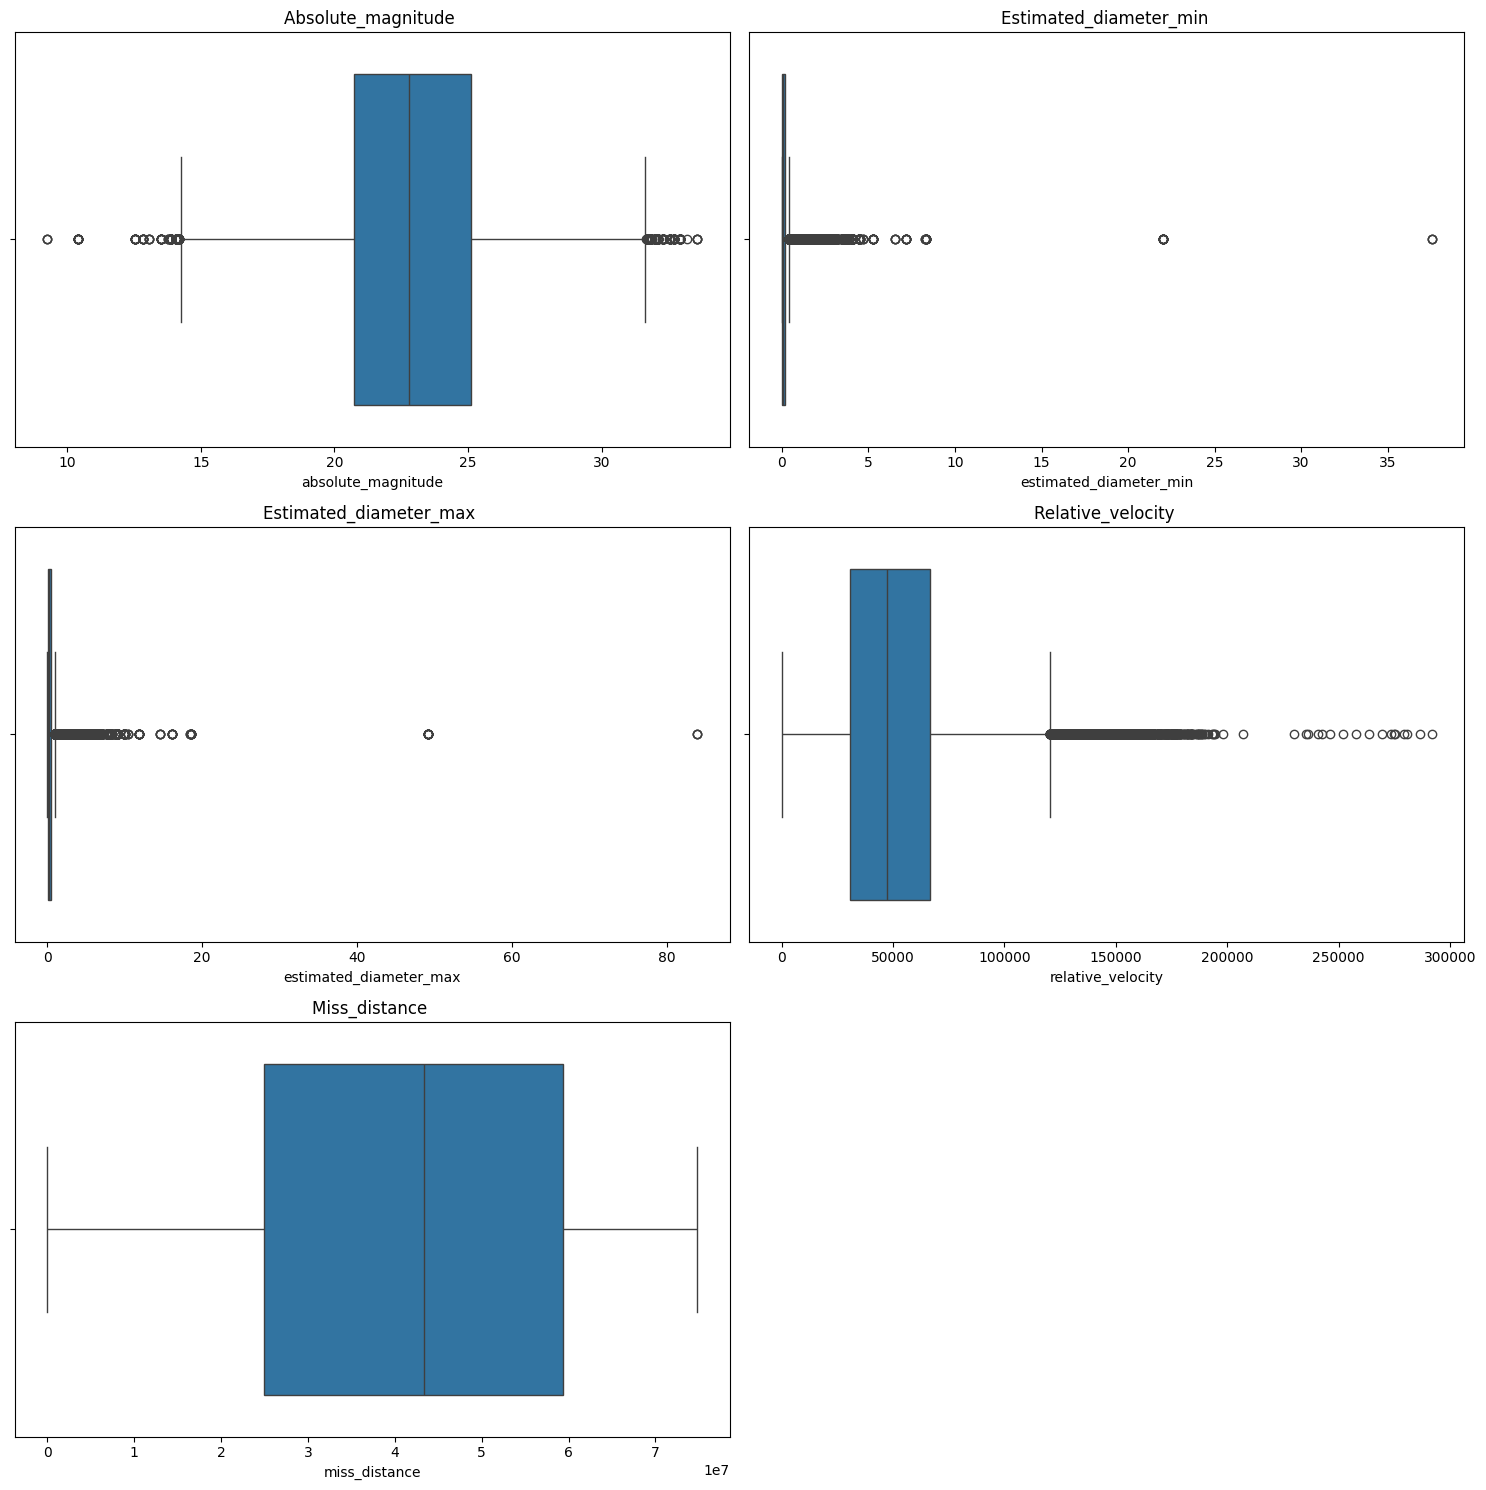

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows and columns needed for the subplots
num_cols = 2
num_rows = (len(continuous_features) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(continuous_features):
    # Calculate the row and column index for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Handle the case when there are fewer plots than subplot spaces
    if row_idx >= num_rows:
        break

    ax = axes[row_idx, col_idx]
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f"{col.capitalize()} ")

# Remove any unused subplots
for i in range(len(continuous_features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

<Axes: >

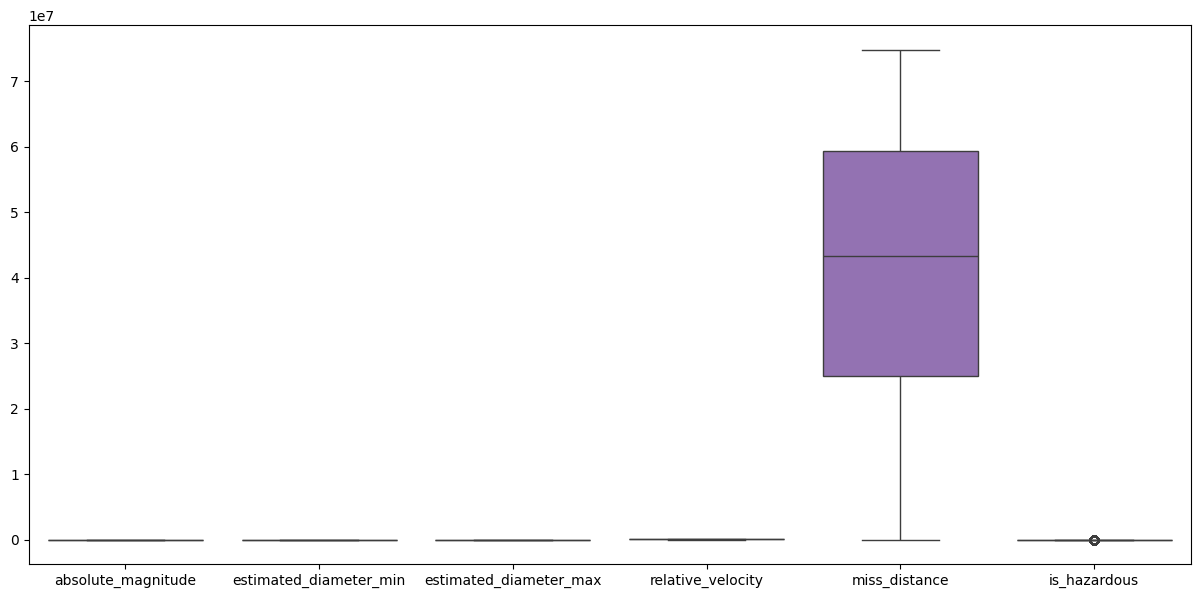

In [ ]:
def handle_outliers(df, columns):
    for column in columns:

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the boundary values
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df
df = handle_outliers(df ,continuous_features )
f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(df)

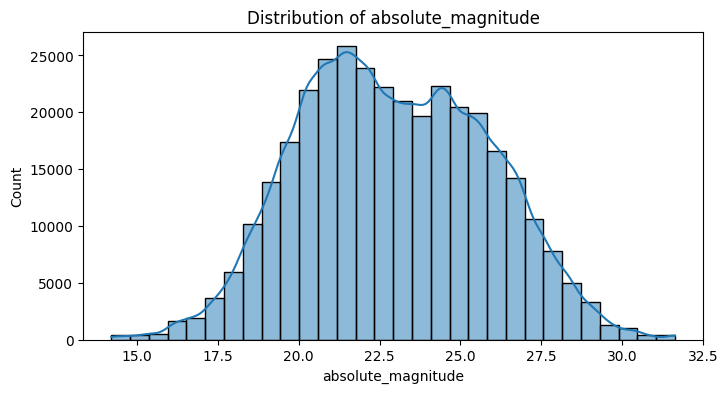

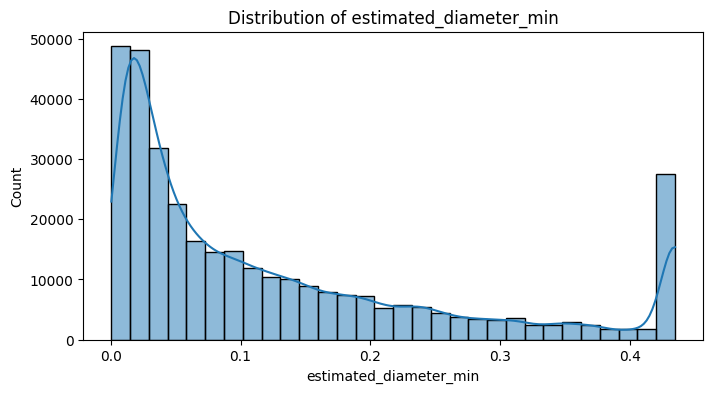

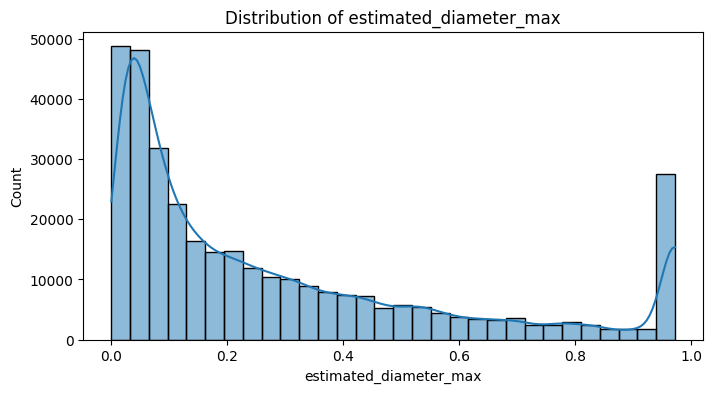

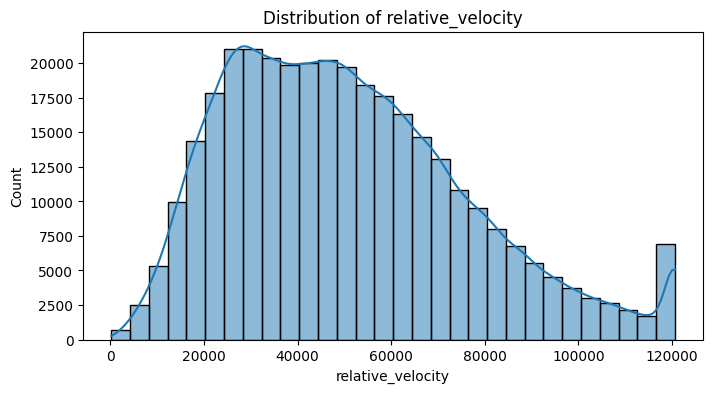

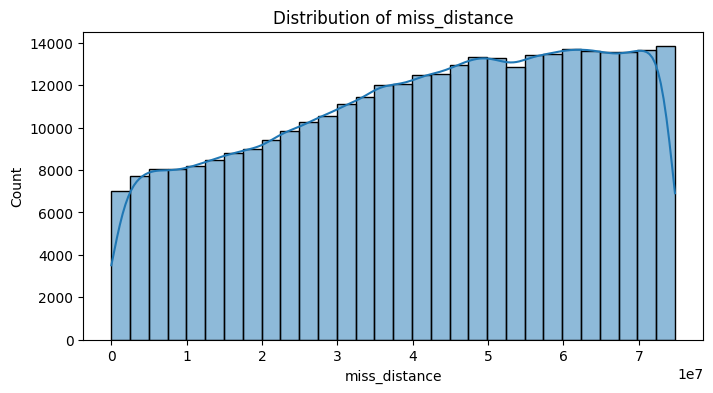

In [ ]:
# Distribution plots for continuous features
for col in continuous_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

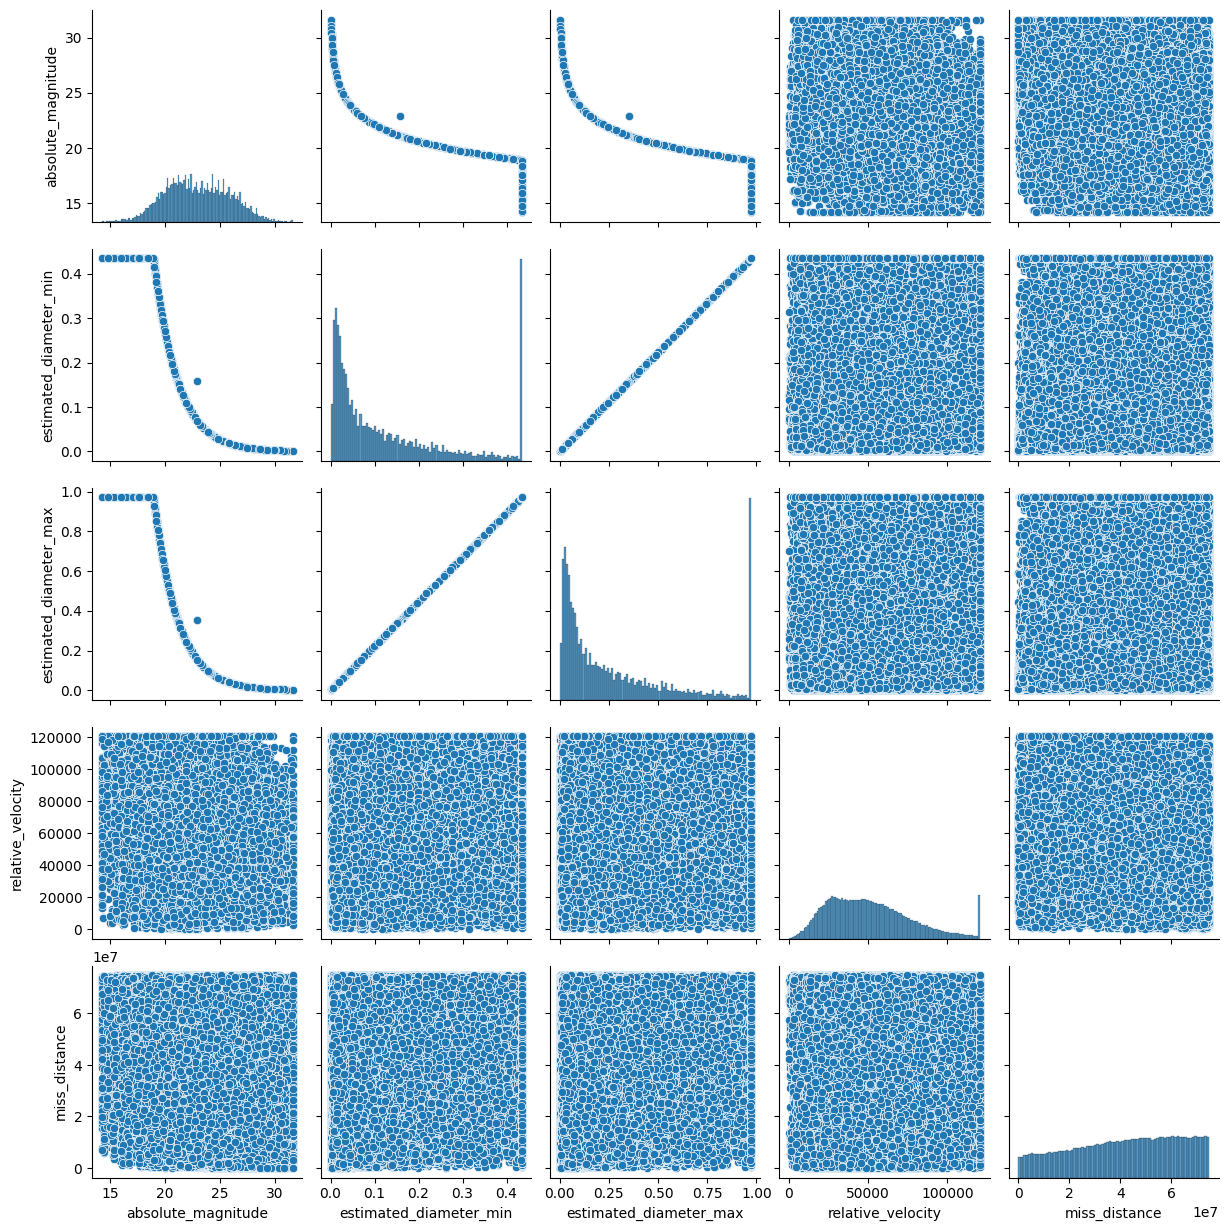

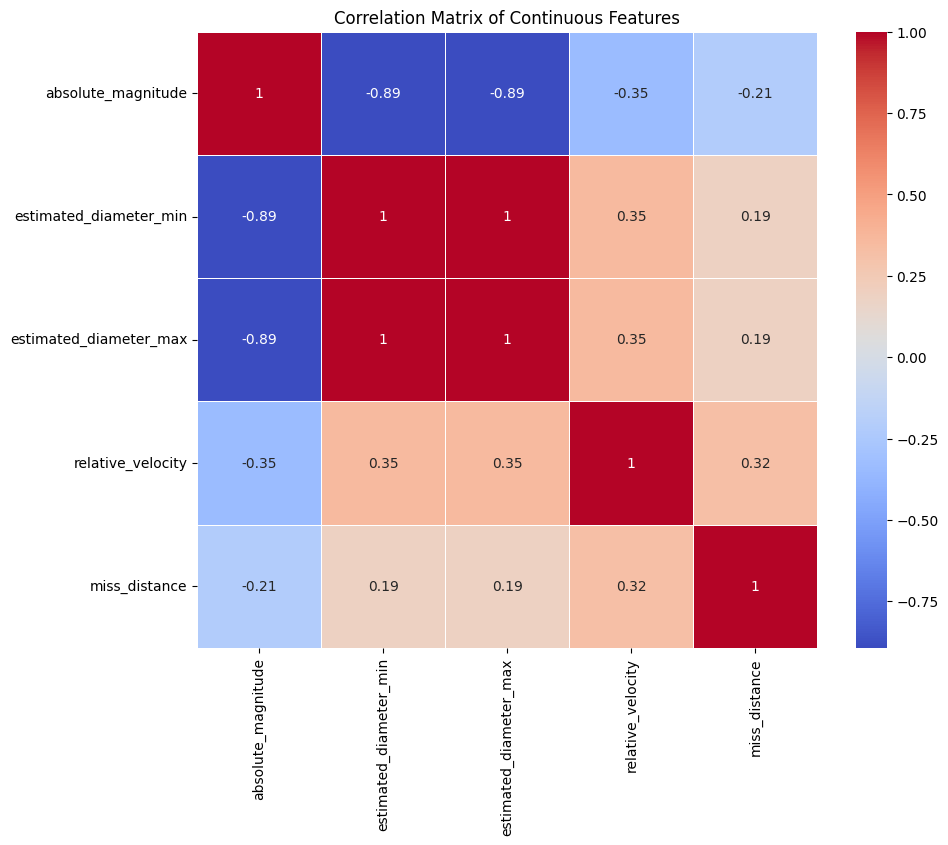

In [ ]:
# Pairplot to observe pairwise relationships
sns.pairplot(df[continuous_features])
plt.show()

# Correlation matrix
corr_matrix = df[continuous_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Features')
plt.show()


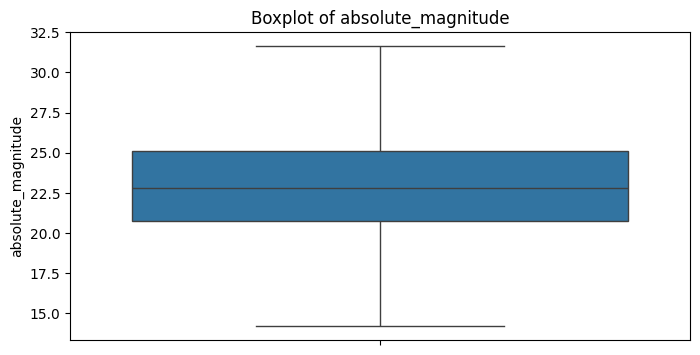

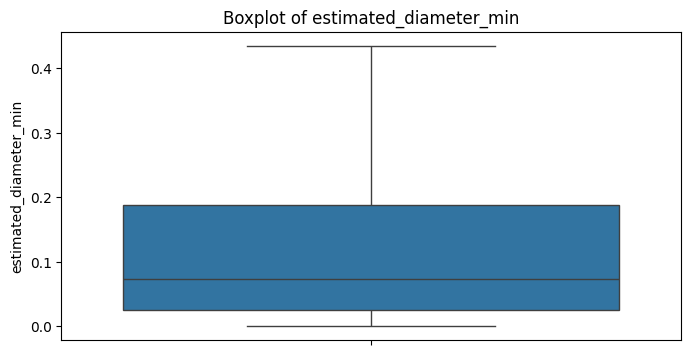

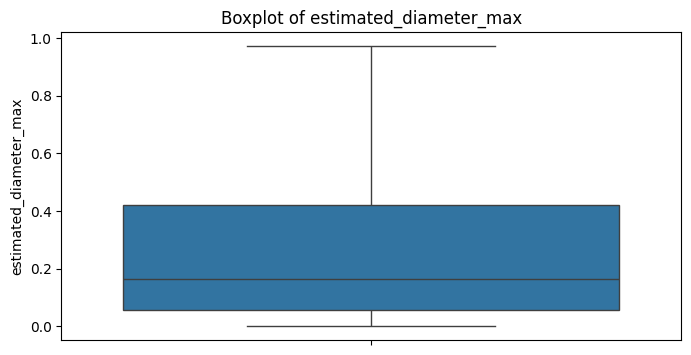

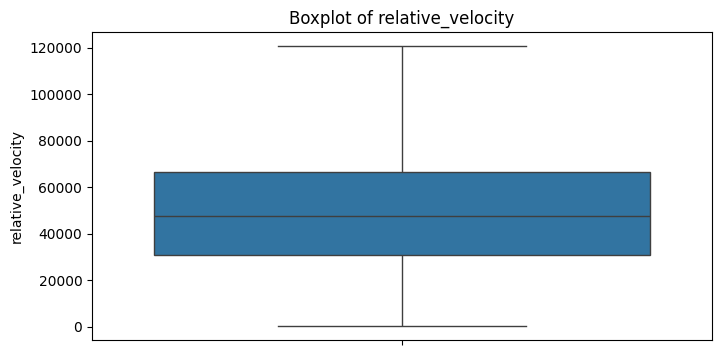

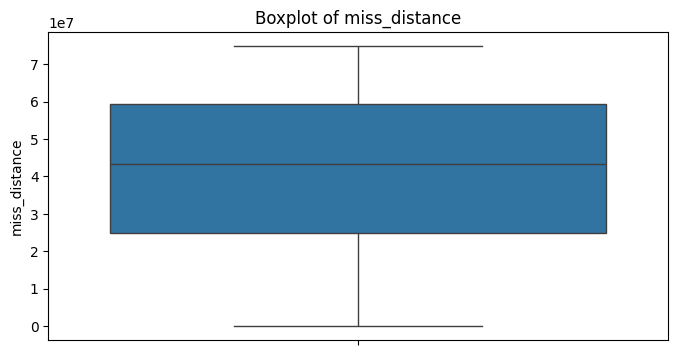

In [ ]:
# Boxplot for continuous features to check outliers
for col in continuous_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


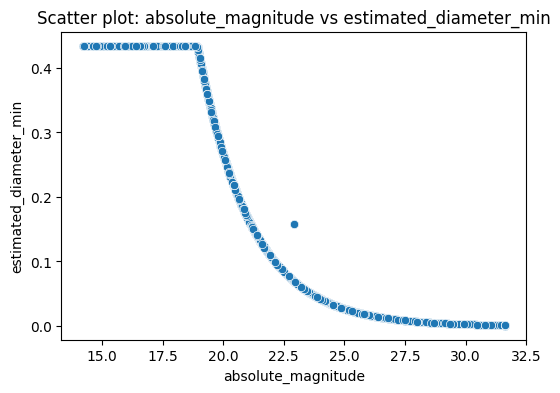

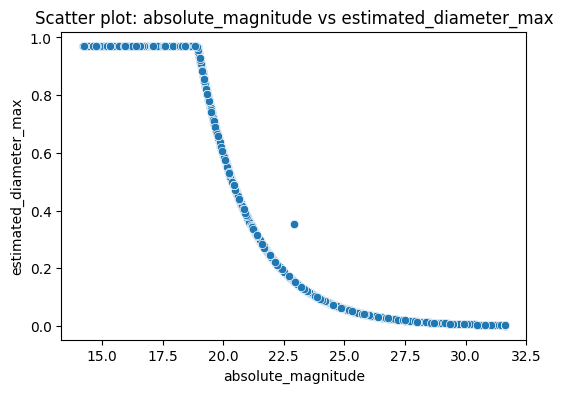

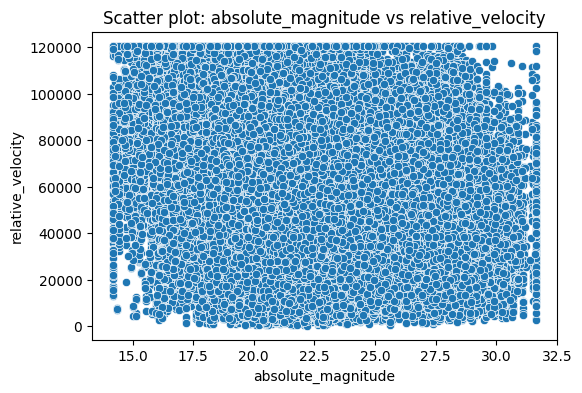

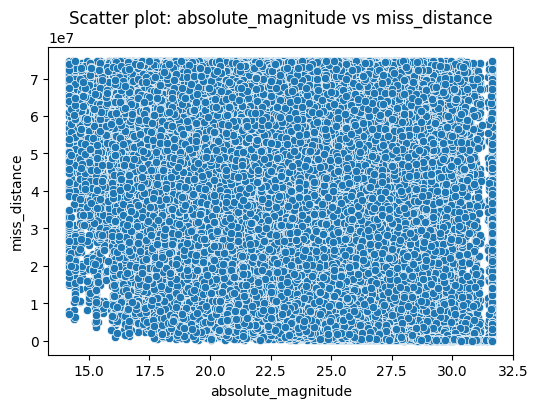

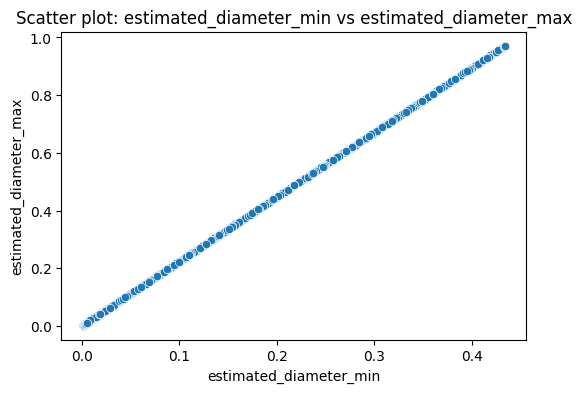

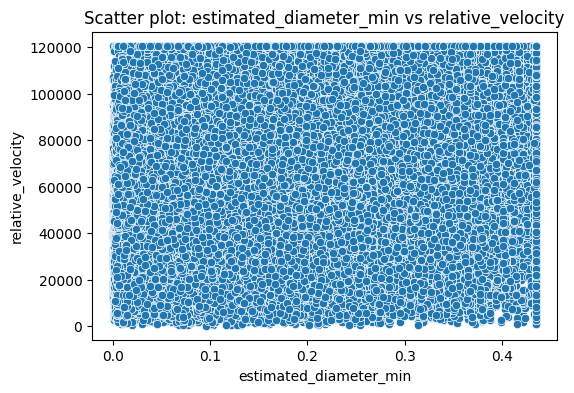

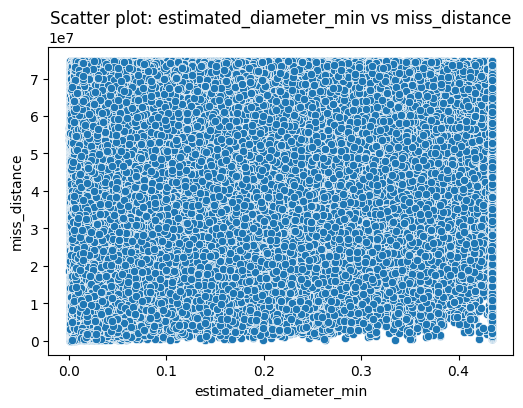

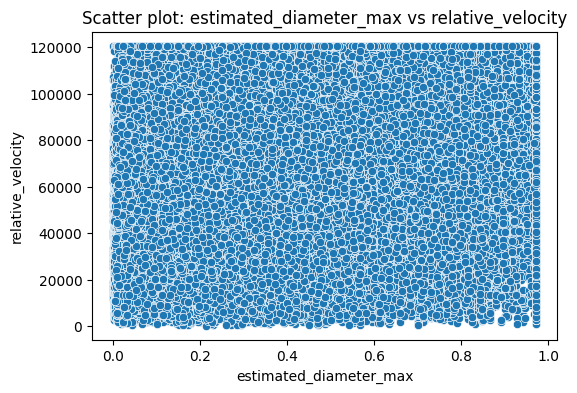

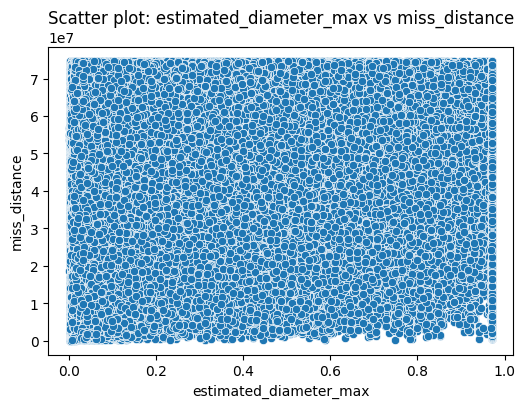

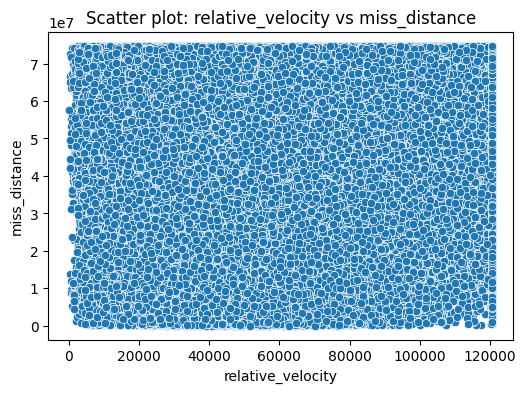

In [ ]:
# Scatter plots between continuous features
for i in range(len(continuous_features)):
    for j in range(i+1, len(continuous_features)):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[continuous_features[i]], y=df[continuous_features[j]])
        plt.title(f'Scatter plot: {continuous_features[i]} vs {continuous_features[j]}')
        plt.show()


In [ ]:
# Scaling numerical features
continuous_features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']

# Choose StandardScaler or MinMaxScaler
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('is_hazardous', axis=1)
y = df['is_hazardous']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Before resampling: {y.value_counts()}")
print(f"After resampling: {y_resampled.value_counts()}")

Before resampling: is_hazardous
False    295032
True      43162
Name: count, dtype: int64
After resampling: is_hazardous
False    295032
True     295032
Name: count, dtype: int64


<Axes: xlabel='is_hazardous'>

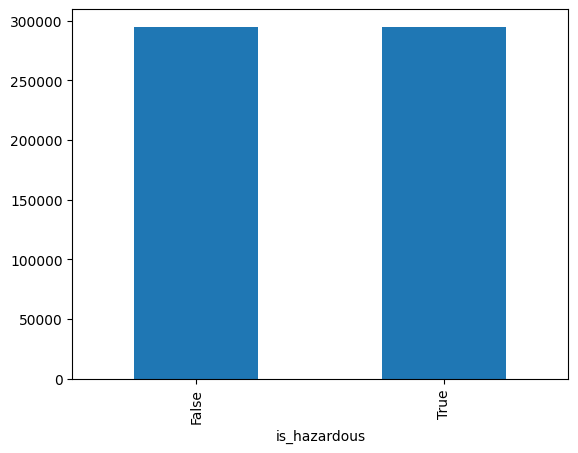

In [ ]:
y_resampled.value_counts().plot(kind='bar')

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")


Train set size: (472051, 5), Test set size: (118013, 5)


In [ ]:
# Import libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Import RocCurveDisplay for plotting ROC curves
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

In [ ]:
# Model Evaluation Using Balanced Accuracy:
from sklearn.metrics import balanced_accuracy_score

# Train your model (example: Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate using balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")


Balanced Accuracy: 0.8149


In [29]:
# Train-Test Split (assuming X_train, X_test, y_train, y_test are already defined)
# Define the models
models = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    "Neural Network": MLPClassifier()

}

# Dictionary to store the evaluation metrics for each model
model_metrics = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Store the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Save the metrics in the dictionary
    model_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": roc_auc
    }

    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC-ROC: {roc_auc:.4f}")


Training Logistic Regression...
Logistic Regression - Accuracy: 0.8153, Precision: 0.7511, Recall: 0.9446, F1-Score: 0.8368, AUC-ROC: 0.8552
Training Decision Tree...
Decision Tree - Accuracy: 0.9212, Precision: 0.9173, Recall: 0.9263, F1-Score: 0.9218, AUC-ROC: 0.9211
Training Random Forest...
Random Forest - Accuracy: 0.9482, Precision: 0.9339, Recall: 0.9651, F1-Score: 0.9492, AUC-ROC: 0.9894
Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9062, Precision: 0.8533, Recall: 0.9817, F1-Score: 0.9130, AUC-ROC: 0.9561
Training Neural Network...
Neural Network - Accuracy: 0.8413, Precision: 0.7657, Recall: 0.9849, F1-Score: 0.8616, AUC-ROC: 0.8900



Evaluating Logistic Regression...
              precision    recall  f1-score   support

       False       0.92      0.69      0.79     58832
        True       0.75      0.94      0.84     59181

    accuracy                           0.82    118013
   macro avg       0.84      0.81      0.81    118013
weighted avg       0.84      0.82      0.81    118013



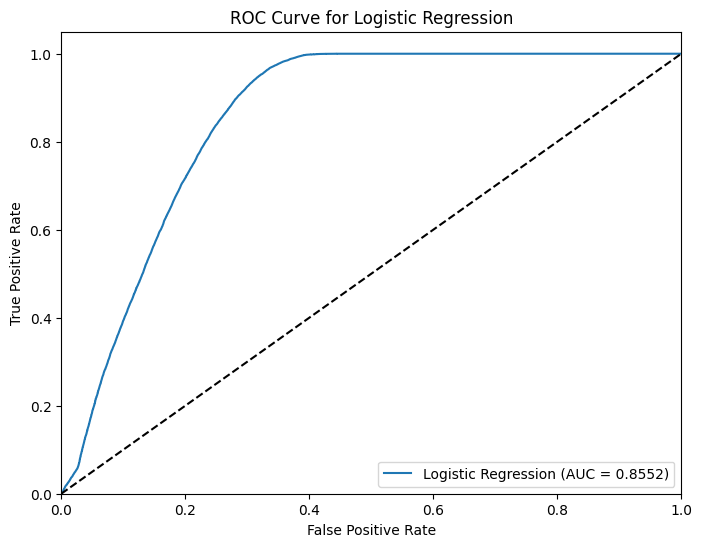


Evaluating Decision Tree...
              precision    recall  f1-score   support

       False       0.93      0.92      0.92     58832
        True       0.92      0.93      0.92     59181

    accuracy                           0.92    118013
   macro avg       0.92      0.92      0.92    118013
weighted avg       0.92      0.92      0.92    118013



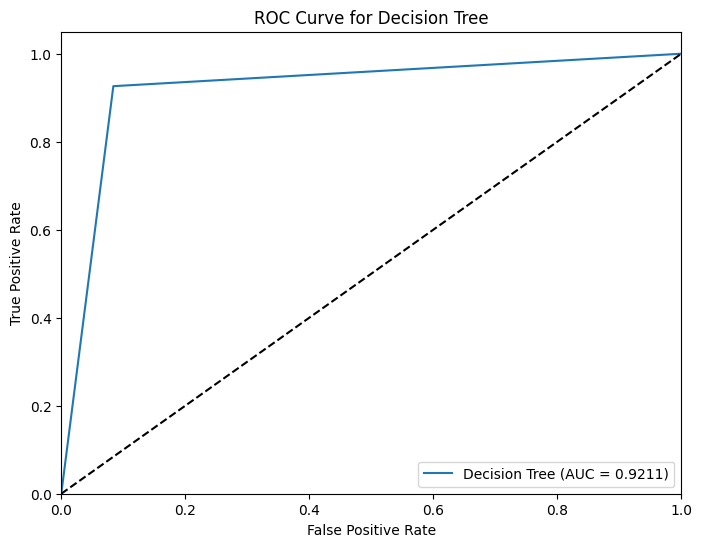


Evaluating Random Forest...
              precision    recall  f1-score   support

       False       0.96      0.93      0.95     58832
        True       0.93      0.97      0.95     59181

    accuracy                           0.95    118013
   macro avg       0.95      0.95      0.95    118013
weighted avg       0.95      0.95      0.95    118013



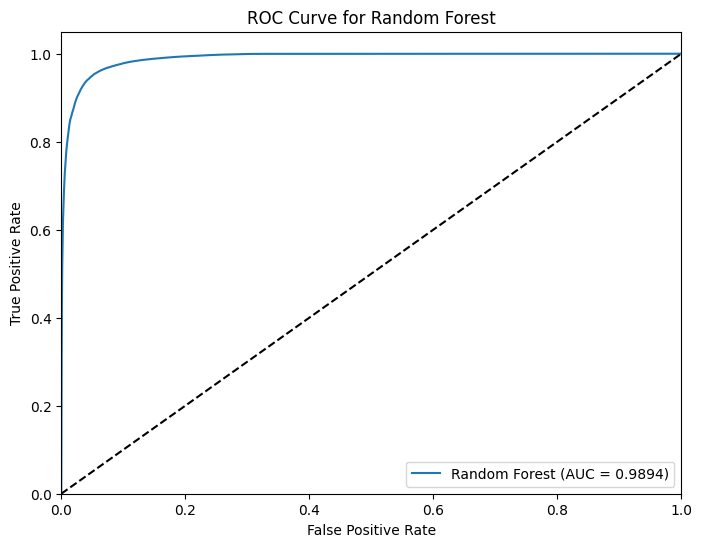


Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

       False       0.98      0.83      0.90     58832
        True       0.85      0.98      0.91     59181

    accuracy                           0.91    118013
   macro avg       0.92      0.91      0.91    118013
weighted avg       0.92      0.91      0.91    118013



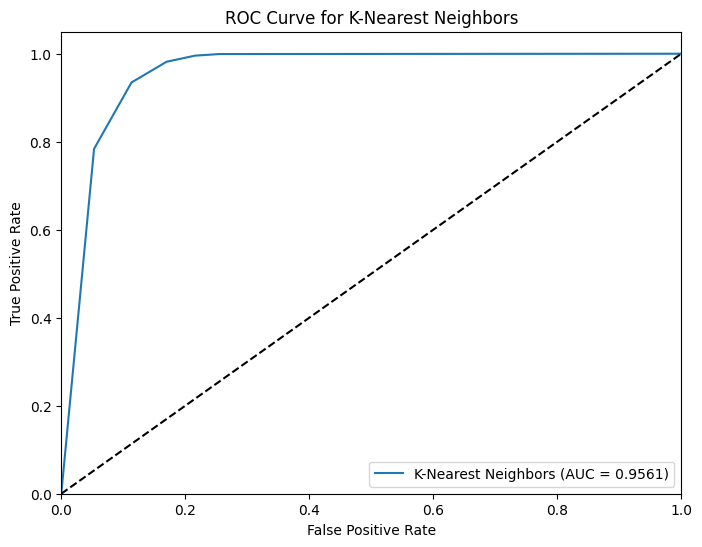


Evaluating Neural Network...
              precision    recall  f1-score   support

       False       0.98      0.70      0.81     58832
        True       0.77      0.98      0.86     59181

    accuracy                           0.84    118013
   macro avg       0.87      0.84      0.84    118013
weighted avg       0.87      0.84      0.84    118013



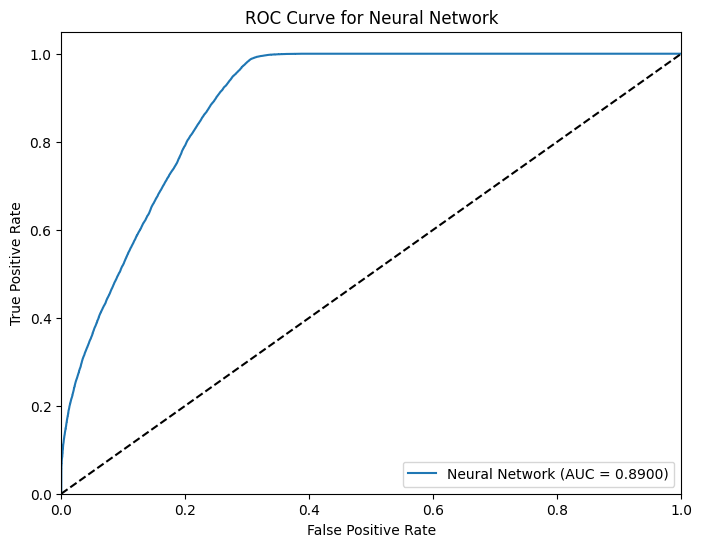

In [30]:
# Evaluate models using classification report and AUC-ROC curve
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report (Precision, Recall, F1-Score)
    print(classification_report(y_test, y_pred))

    # Plot AUC-ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()


In [31]:
# Print model metrics comparison
print("\nModel Comparison:")
for model_name, metrics in model_metrics.items():
    print(f"\n{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")



Model Comparison:

Logistic Regression:
Accuracy: 0.8153
Precision: 0.7511
Recall: 0.9446
F1-Score: 0.8368
AUC-ROC: 0.8552

Decision Tree:
Accuracy: 0.9212
Precision: 0.9173
Recall: 0.9263
F1-Score: 0.9218
AUC-ROC: 0.9211

Random Forest:
Accuracy: 0.9482
Precision: 0.9339
Recall: 0.9651
F1-Score: 0.9492
AUC-ROC: 0.9894

K-Nearest Neighbors:
Accuracy: 0.9062
Precision: 0.8533
Recall: 0.9817
F1-Score: 0.9130
AUC-ROC: 0.9561

Neural Network:
Accuracy: 0.8413
Precision: 0.7657
Recall: 0.9849
F1-Score: 0.8616
AUC-ROC: 0.8900


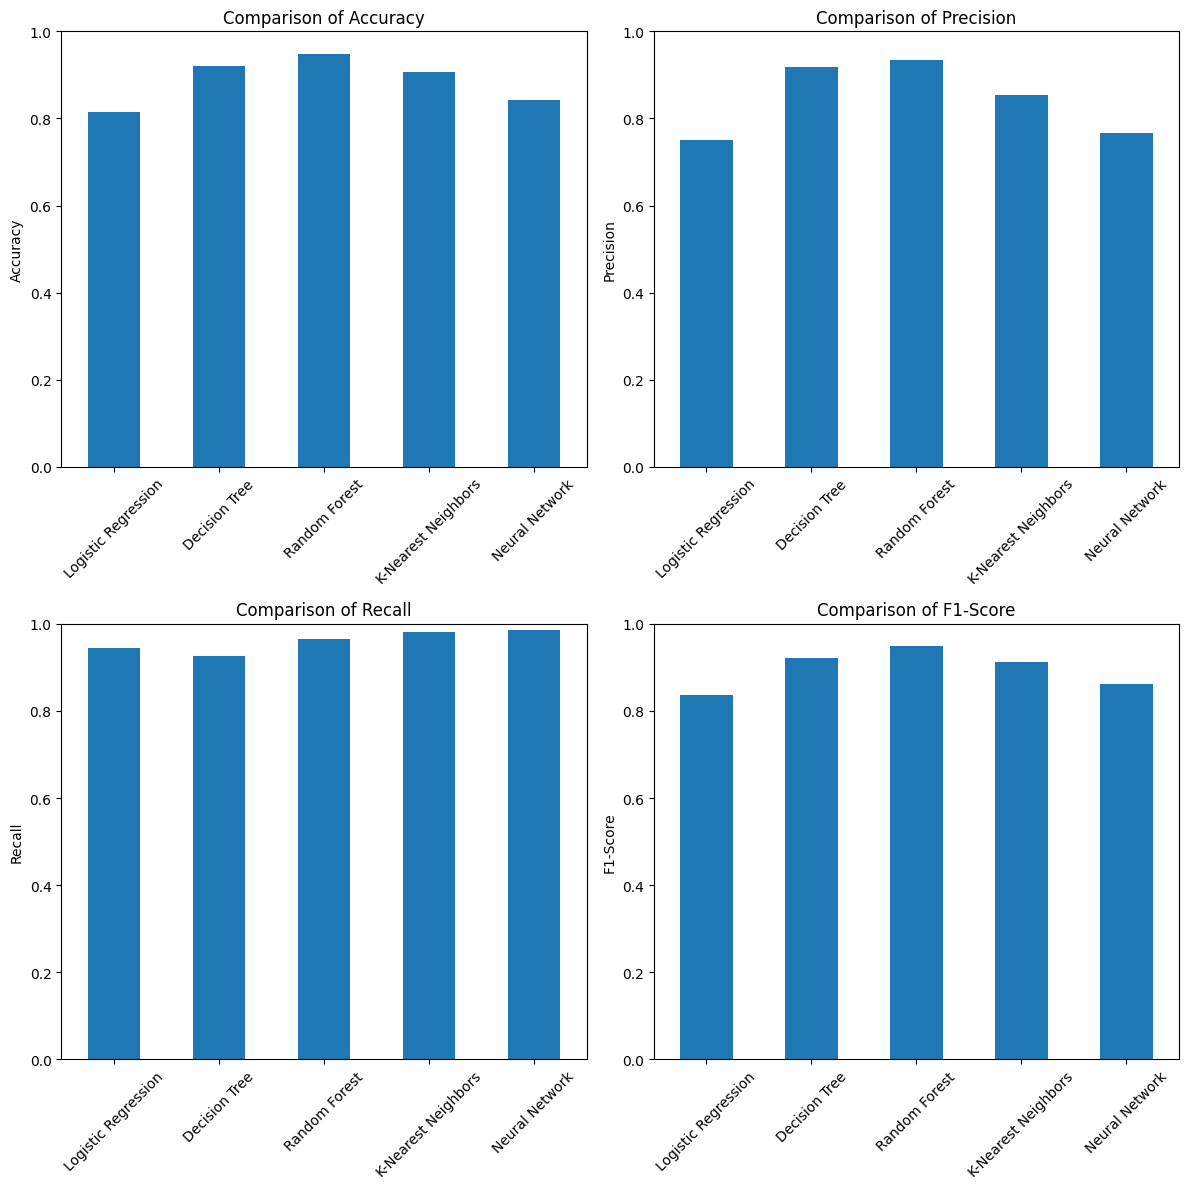

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Convert dictionary to a more convenient format for plotting
metrics_df = pd.DataFrame(model_metrics).T

# Set up the metrics you want to plot
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Plot comparison of models for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # 2x2 grid for multiple plots

for i, metric in enumerate(metrics_to_plot):
    ax = axs[i//2, i%2]
    metrics_df[metric].plot(kind='bar', ax=ax)
    ax.set_title(f"Comparison of {metric}")
    ax.set_ylabel(metric)
    ax.set_ylim([0, 1])
    ax.set_xticks(np.arange(len(metrics_df)))
    ax.set_xticklabels(metrics_df.index, rotation=45)

plt.tight_layout()
plt.show()


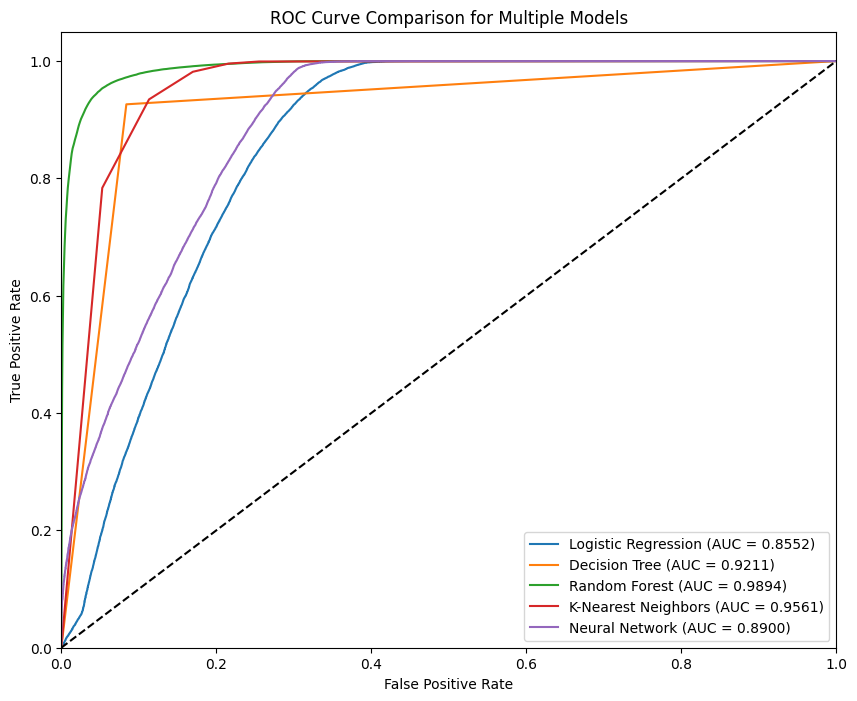

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC Curves for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Get the probability predictions for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Multiple Models')
plt.legend(loc="lower right")
plt.show()


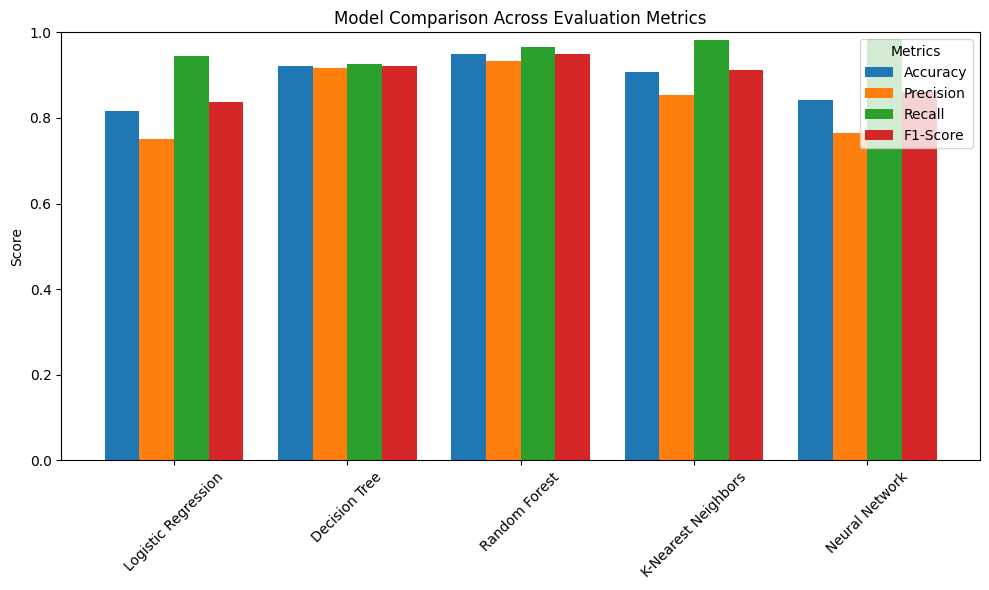

In [34]:
# Plot all metrics together in a grouped bar chart
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score"]
fig, ax = plt.subplots(figsize=(10, 6))

metrics_df[metrics_to_plot].plot(kind='bar', ax=ax, width=0.8)

# Set titles and labels
ax.set_title("Model Comparison Across Evaluation Metrics")
ax.set_ylabel("Score")
ax.set_ylim([0, 1])
plt.xticks(rotation=45)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()
